<a href="https://colab.research.google.com/github/DaniSumaili/7048CEM/blob/main/Classification_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
# Sklearn modules & classes
from sklearn.linear_model import Perceptron, LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import matthews_corrcoef,cohen_kappa_score, mean_absolute_error,mean_squared_error 

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
breastdata = pd.read_csv('/content/drive/My Drive/BreastCancer/Breast_GSE45827.csv')
breastdata.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1552256_a_at,1552257_a_at,1552258_at,1552261_at,1552263_at,1552264_a_at,1552266_at,1552269_at,1552271_at,1552272_a_at,1552274_at,1552275_s_at,1552276_a_at,1552277_a_at,1552278_a_at,1552279_a_at,1552280_at,1552281_at,1552283_s_at,1552286_at,1552287_s_at,1552288_at,1552289_a_at,1552291_at,1552293_at,...,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMRGE/M10098_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-LysX-3_at,AFFX-LysX-5_at,AFFX-LysX-M_at,AFFX-M27830_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,AFFX-PheX-3_at,AFFX-PheX-5_at,AFFX-PheX-M_at,AFFX-r2-Bs-dap-3_at,AFFX-r2-Bs-dap-5_at,AFFX-r2-Bs-dap-M_at,AFFX-r2-Bs-lys-3_at,AFFX-r2-Bs-lys-5_at,AFFX-r2-Bs-lys-M_at,AFFX-r2-Bs-phe-3_at,AFFX-r2-Bs-phe-5_at,AFFX-r2-Bs-phe-M_at,AFFX-r2-Bs-thr-3_s_at,AFFX-r2-Bs-thr-5_s_at,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,8.870780,3.278896,7.317273,6.941792,4.753893,9.689422,9.529578,4.416768,4.061347,6.468291,8.671009,3.766666,3.711459,5.076329,4.442042,6.741298,5.627442,5.516712,8.107136,4.956239,5.791279,3.569233,5.687476,4.152096,4.906925,8.206707,4.463950,5.186044,5.942088,4.191142,...,9.015007,12.050521,14.750905,13.359472,5.576968,3.606041,4.481027,5.509117,10.544533,11.200692,5.932332,4.253946,5.052679,7.782348,7.056759,7.787824,4.784976,3.943038,3.903069,6.119248,4.461984,4.752744,6.761262,5.298281,6.048960,8.292124,8.225293,8.333853,9.854639,9.823275,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,7.767646,3.589636,8.768129,7.567034,4.859823,8.459354,8.973671,4.503730,5.390424,6.756707,8.105795,4.651541,3.935309,5.228763,4.454780,6.468014,5.798596,5.306064,7.505800,4.636866,5.898319,3.749061,5.582313,4.449042,5.871074,7.242601,3.938327,4.378953,6.294126,4.058221,...,9.371174,8.264719,9.938357,9.507651,6.103962,3.983087,4.742306,5.424172,8.881772,11.148811,6.330691,4.755615,5.474167,8.542725,7.617779,8.237535,5.209694,3.939264,4.553344,6.017351,5.425393,4.957182,7.405313,5.615380,6.617585,8.225366,8.409790,8.499343,10.061910,9.796947,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,9.417956,3.552253,7.945085,7.238284,4.872635,9.367521,9.133688,4.358608,4.445164,5.476936,8.752115,3.546838,4.263868,5.509159,4.624205,7.103216,6.641263,5.141131,7.072525,4.728196,6.233648,3.766725,6.008163,4.191390,5.717077,7.809222,4.108028,5.012451,7.258626,4.330997,...,8.842430,10.241912,13.605901,11.784269,5.853014,3.748889,4.407490,5.919699,9.687444,11.601339,6.040000,4.314678,5.274790,8.030696,7.082369,7.912491,4.725483,4.036020,4.141341,5.825904,5.032693,4.764559,7.026349,5.448507,6.386042,8.218749,8.209361,8.280136,9.699647,9.452066,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,9.022345,3.312473,7.754670,7.078843,4.867320,7.790225,7.206228,4.680283,4.171577,5.985232,7.205984,3.568459,3.310109,5.166409,4.160049,6.730255,5.774961,6.092539,7.164589,4.903609,5.726683,3.532517,5.652934,3.997426,6.151148,7.189197,4.329053,5.134634,6.300199,4.192591,...,10.554449,9.191622,12.146083,11.018158,5.972863,3.658838,4.657377,5.508931,9.262102,11.338670,6.194179,4.300024,5.072087,8.148625,7.548858,7.960282,5.226375,3.562438,4.306947,5.979139,5.018239,4.872679,7.066764,5.573531,6.637775,8.183538,8.307374,8.233631,9.911691,9.611842,

Turn the target class into categorical 

In [ ]:
breastdata.dtypes

samples              int64
type                object
1007_s_at          float64
1053_at            float64
117_at             float64
                    ...   
AFFX-ThrX-5_at     float64
AFFX-ThrX-M_at     float64
AFFX-TrpnX-3_at    float64
AFFX-TrpnX-5_at    float64
AFFX-TrpnX-M_at    float64
Length: 54677, dtype: object

In [ ]:
bc = breastdata.copy()
#bc.head()


In [ ]:
#change the type(target class) column into category 
bc["type"] = bc["type"].astype('category')
bc.dtypes

samples               int64
type               category
1007_s_at           float64
1053_at             float64
117_at              float64
                     ...   
AFFX-ThrX-5_at      float64
AFFX-ThrX-M_at      float64
AFFX-TrpnX-3_at     float64
AFFX-TrpnX-5_at     float64
AFFX-TrpnX-M_at     float64
Length: 54677, dtype: object

In [ ]:
bc["type_cat"] = bc["type"].cat.codes

In [ ]:
print(bc['type'].unique())
print('------------------------------------')
print(bc['type_cat'].unique())

['basal', 'HER', 'cell_line', 'normal', 'luminal_A', 'luminal_B']
Categories (6, object): ['basal', 'HER', 'cell_line', 'normal', 'luminal_A', 'luminal_B']
------------------------------------
[1 0 2 5 3 4]


In [ ]:
bc.head(5)

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1552256_a_at,1552257_a_at,1552258_at,1552261_at,1552263_at,1552264_a_at,1552266_at,1552269_at,1552271_at,1552272_a_at,1552274_at,1552275_s_at,1552276_a_at,1552277_a_at,1552278_a_at,1552279_a_at,1552280_at,1552281_at,1552283_s_at,1552286_at,1552287_s_at,1552288_at,1552289_a_at,1552291_at,1552293_at,...,AFFX-HUMRGE/M10098_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-LysX-3_at,AFFX-LysX-5_at,AFFX-LysX-M_at,AFFX-M27830_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,AFFX-PheX-3_at,AFFX-PheX-5_at,AFFX-PheX-M_at,AFFX-r2-Bs-dap-3_at,AFFX-r2-Bs-dap-5_at,AFFX-r2-Bs-dap-M_at,AFFX-r2-Bs-lys-3_at,AFFX-r2-Bs-lys-5_at,AFFX-r2-Bs-lys-M_at,AFFX-r2-Bs-phe-3_at,AFFX-r2-Bs-phe-5_at,AFFX-r2-Bs-phe-M_at,AFFX-r2-Bs-thr-3_s_at,AFFX-r2-Bs-thr-5_s_at,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,type_cat
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,8.870780,3.278896,7.317273,6.941792,4.753893,9.689422,9.529578,4.416768,4.061347,6.468291,8.671009,3.766666,3.711459,5.076329,4.442042,6.741298,5.627442,5.516712,8.107136,4.956239,5.791279,3.569233,5.687476,4.152096,4.906925,8.206707,4.463950,5.186044,5.942088,4.191142,...,12.050521,14.750905,13.359472,5.576968,3.606041,4.481027,5.509117,10.544533,11.200692,5.932332,4.253946,5.052679,7.782348,7.056759,7.787824,4.784976,3.943038,3.903069,6.119248,4.461984,4.752744,6.761262,5.298281,6.048960,8.292124,8.225293,8.333853,9.854639,9.823275,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999,1
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,7.767646,3.589636,8.768129,7.567034,4.859823,8.459354,8.973671,4.503730,5.390424,6.756707,8.105795,4.651541,3.935309,5.228763,4.454780,6.468014,5.798596,5.306064,7.505800,4.636866,5.898319,3.749061,5.582313,4.449042,5.871074,7.242601,3.938327,4.378953,6.294126,4.058221,...,8.264719,9.938357,9.507651,6.103962,3.983087,4.742306,5.424172,8.881772,11.148811,6.330691,4.755615,5.474167,8.542725,7.617779,8.237535,5.209694,3.939264,4.553344,6.017351,5.425393,4.957182,7.405313,5.615380,6.617585,8.225366,8.409790,8.499343,10.061910,9.796947,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299,1
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,9.417956,3.552253,7.945085,7.238284,4.872635,9.367521,9.133688,4.358608,4.445164,5.476936,8.752115,3.546838,4.263868,5.509159,4.624205,7.103216,6.641263,5.141131,7.072525,4.728196,6.233648,3.766725,6.008163,4.191390,5.717077,7.809222,4.108028,5.012451,7.258626,4.330997,...,10.241912,13.605901,11.784269,5.853014,3.748889,4.407490,5.919699,9.687444,11.601339,6.040000,4.314678,5.274790,8.030696,7.082369,7.912491,4.725483,4.036020,4.141341,5.825904,5.032693,4.764559,7.026349,5.448507,6.386042,8.218749,8.209361,8.280136,9.699647,9.452066,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535,1
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,9.022345,3.312473,7.754670,7.078843,4.867320,7.790225,7.206228,4.680283,4.171577,5.985232,7.205984,3.568459,3.310109,5.166409,4.160049,6.730255,5.774961,6.092539,7.164589,4.903609,5.726683,3.532517,5.652934,3.997426,6.151148,7.189197,4.329053,5.134634,6.300199,4.192591,...,9.191622,12.146083,11.018158,5.972863,3.658838,4.657377,5.508931,9.262102,11.338670,6.194179,4.300024,5.072087,8.148625,7.548858,7.960282,5.226375,3.562438,4.306947,5.979139,5.018239,4.872679,7.066764,5.573531,6.637775,8.183538,8.307374,8.233631,9.911691,9.611842,12.111235,11.719215,13.743108,13.508861,6.610284,5

In [ ]:
X = bc.iloc[:, 2:-1]
y = bc.type_cat
#X.head()

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1552256_a_at,1552257_a_at,1552258_at,1552261_at,1552263_at,1552264_a_at,1552266_at,1552269_at,1552271_at,1552272_a_at,1552274_at,1552275_s_at,1552276_a_at,1552277_a_at,1552278_a_at,1552279_a_at,1552280_at,1552281_at,1552283_s_at,1552286_at,1552287_s_at,1552288_at,1552289_a_at,1552291_at,1552293_at,1552295_a_at,1552296_at,...,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMRGE/M10098_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-LysX-3_at,AFFX-LysX-5_at,AFFX-LysX-M_at,AFFX-M27830_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,AFFX-PheX-3_at,AFFX-PheX-5_at,AFFX-PheX-M_at,AFFX-r2-Bs-dap-3_at,AFFX-r2-Bs-dap-5_at,AFFX-r2-Bs-dap-M_at,AFFX-r2-Bs-lys-3_at,AFFX-r2-Bs-lys-5_at,AFFX-r2-Bs-lys-M_at,AFFX-r2-Bs-phe-3_at,AFFX-r2-Bs-phe-5_at,AFFX-r2-Bs-phe-M_at,AFFX-r2-Bs-thr-3_s_at,AFFX-r2-Bs-thr-5_s_at,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,8.870780,3.278896,7.317273,6.941792,4.753893,9.689422,9.529578,4.416768,4.061347,6.468291,8.671009,3.766666,3.711459,5.076329,4.442042,6.741298,5.627442,5.516712,8.107136,4.956239,5.791279,3.569233,5.687476,4.152096,4.906925,8.206707,4.463950,5.186044,5.942088,4.191142,7.413500,3.281950,...,9.015007,12.050521,14.750905,13.359472,5.576968,3.606041,4.481027,5.509117,10.544533,11.200692,5.932332,4.253946,5.052679,7.782348,7.056759,7.787824,4.784976,3.943038,3.903069,6.119248,4.461984,4.752744,6.761262,5.298281,6.048960,8.292124,8.225293,8.333853,9.854639,9.823275,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,7.767646,3.589636,8.768129,7.567034,4.859823,8.459354,8.973671,4.503730,5.390424,6.756707,8.105795,4.651541,3.935309,5.228763,4.454780,6.468014,5.798596,5.306064,7.505800,4.636866,5.898319,3.749061,5.582313,4.449042,5.871074,7.242601,3.938327,4.378953,6.294126,4.058221,6.799876,3.004077,...,9.371174,8.264719,9.938357,9.507651,6.103962,3.983087,4.742306,5.424172,8.881772,11.148811,6.330691,4.755615,5.474167,8.542725,7.617779,8.237535,5.209694,3.939264,4.553344,6.017351,5.425393,4.957182,7.405313,5.615380,6.617585,8.225366,8.409790,8.499343,10.061910,9.796947,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,9.417956,3.552253,7.945085,7.238284,4.872635,9.367521,9.133688,4.358608,4.445164,5.476936,8.752115,3.546838,4.263868,5.509159,4.624205,7.103216,6.641263,5.141131,7.072525,4.728196,6.233648,3.766725,6.008163,4.191390,5.717077,7.809222,4.108028,5.012451,7.258626,4.330997,6.901454,4.032173,...,8.842430,10.241912,13.605901,11.784269,5.853014,3.748889,4.407490,5.919699,9.687444,11.601339,6.040000,4.314678,5.274790,8.030696,7.082369,7.912491,4.725483,4.036020,4.141341,5.825904,5.032693,4.764559,7.026349,5.448507,6.386042,8.218749,8.209361,8.280136,9.699647,9.452066,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,9.022345,3.312473,7.754670,7.078843,4.867320,7.790225,7.206228,4.680283,4.171577,5.985232,7.205984,3.568459,3.310109,5.166409,4.160049,6.730255,5.774961,6.092539,7.164589,4.903609,5.726683,3.532517,5.652934,3.997426,6.151148,7.189197,4.329053,5.134634,6.300199,4.192591,7.082357,3.249017,...,10.554449,9.191622,12.146083,11.018158,5.972863,3.658838,4.657377,5.508931,9.262102,11.338670,6.194179,4.300024,5.072087,8.148625,7.548858,7.960282,5.226375,3.562438,4.306947,5.979139,5.018239,4.872679,7.066764,5.573531,6.63777

In [ ]:
print(breastdata.shape)
print(bc.shape)
print(X.shape)

(151, 54677)
(151, 54678)
(151, 54675)


**SVM Cross validation - 3 fold cross validation log kernel**

class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import svm
from sklearn.svm import SVC
clf = svm.SVC(kernel= 'poly', C=1, random_state= 42)
scores = cross_val_score(clf, X, y, cv= 5)
scores

array([0.96774194, 0.96666667, 0.93333333, 0.93333333, 0.93333333])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.95 accuracy with a standard deviation of 0.02


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, roc_auc_score,roc_curve
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import matthews_corrcoef

             SVM Confusion Matrix CV=5         


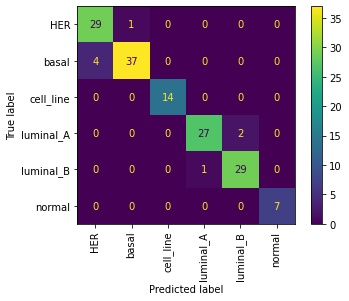

In [ ]:
label = [ 'HER','basal','cell_line', 'luminal_A','luminal_B','normal'] 
y_pred=cross_val_predict(clf, X,y,cv=5)  
cm = confusion_matrix(y, y_pred)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= label)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= label)
print("             SVM Confusion Matrix CV=5         ")
disp.plot(xticks_rotation='vertical')


In [ ]:
print("\033[1m"  +'      ' +  'SVM Stratified cross-validation CV=5'  + "\033[0m"    )
print("                                                          ")
print("Correctly Classified Instances = {}.".format(accuracy_score(y, y_pred, normalize=False)))
print("Percentage of Correctly Classified Instances = {:.2f}.".format(accuracy_score(y, y_pred,)))
print('Kappa statistic= {:.2f}.'. format(cohen_kappa_score(y , y_pred)))
print('Mean absolute error = {:.2f}.'. format(mean_absolute_error(y , y_pred, multioutput= 'uniform_average')))
print('Root Mean Squared error = {:.2f}.'. format(mean_squared_error (y , y_pred, squared=False)))
print('Matthews Corrcoef = {:.2f}.'. format(matthews_corrcoef(y, y_pred)))
print("Accuracy =% 0.2f with a %0.2f standard deviation" % (scores.mean(), scores.std()))
print("                                                          ")
print("\033[1m"  +'                 ' +  'Detailed Accuracy By Class' + "\033[0m" )
print(classification_report(y,y_pred,target_names=label ))


      SVM Stratified cross-validation CV=5
                                                          
Correctly Classified Instances = 143.
Percentage of Correctly Classified Instances = 0.95.
Kappa statistic= 0.93.
Mean absolute error = 0.05.
Root Mean Squared error = 0.23.
Matthews Corrcoef = 0.93.
Accuracy = 0.95 with a 0.02 standard deviation
                                                          
                 Detailed Accuracy By Class
              precision    recall  f1-score   support

         HER       0.88      0.97      0.92        30
       basal       0.97      0.90      0.94        41
   cell_line       1.00      1.00      1.00        14
   luminal_A       0.96      0.93      0.95        29
   luminal_B       0.94      0.97      0.95        30
      normal       1.00      1.00      1.00         7

    accuracy                           0.95       151
   macro avg       0.96      0.96      0.96       151
weighted avg       0.95      0.95      0.95       151



**Decision Tree 3 fold cross validation - CrossValidation CV=5**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


**criterion** :{“gini”, “entropy”}, default=”gini”
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.(C4.5 in python and J48 in WEKA)

**min_samples_leaf** : int or float, default=1
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
If int, then consider min_samples_leaf as the minimum number.
If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

def __init__(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)

In [ ]:
#clf_dt = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 2, ccp_alpha = 0.25)
clf_dt = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 2)
#clf_dt = tree.DecisionTreeClassifier(random_state = 0)
scores_dt = cross_val_score(clf_dt, X, y, cv= 5)
scores_dt

array([0.77419355, 0.83333333, 0.83333333, 0.7       , 0.86666667])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_dt.mean(), scores_dt.std()))

0.80 accuracy with a standard deviation of 0.06


             Decision Tree Confusion Matrix CV=5      


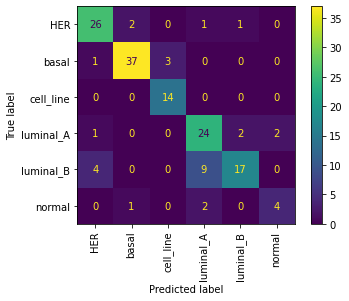

In [ ]:
label = [ 'HER','basal','cell_line', 'luminal_A','luminal_B','normal'] 
y_pred_dt=cross_val_predict(clf_dt, X,y,cv=5)  
cm_dt = confusion_matrix(y, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt,display_labels= label)

print("             Decision Tree Confusion Matrix CV=5      ")
disp_dt.plot(xticks_rotation='vertical')

In [ ]:
print("\033[1m"  +'      ' +  ' Decison Tree Stratified cross-validation CV=5'  + "\033[0m"    )
print("                                                          ")
print("Correctly Classified Instances = {}.".format(accuracy_score(y, y_pred_dt, normalize=False)))
print("Percentage of Correctly Classified Instances = {:.2f}.".format(accuracy_score(y, y_pred_dt,)))
print('Kappa statistic= {:.2f}.'. format(cohen_kappa_score(y , y_pred_dt)))
print('Mean absolute error = {:.2f}.'. format(mean_absolute_error(y , y_pred_dt, multioutput= 'uniform_average')))
print('Root Mean Squared error = {:.2f}.'. format(mean_squared_error (y , y_pred_dt, squared=False)))
print('Matthews Corrcoef = {:.2f}.'. format(matthews_corrcoef(y, y_pred_dt)))
print("Accuracy =% 0.2f with a %0.2f standard deviation" % (scores_dt.mean(), scores_dt.std()))
print("                                                          ")
print("\033[1m"  +'                 ' +  'Detailed Accuracy By Class' + "\033[0m" )
print(classification_report(y, y_pred_dt, target_names=label ))

       Decison Tree Stratified cross-validation CV=5
                                                          
Correctly Classified Instances = 122.
Percentage of Correctly Classified Instances = 0.81.
Kappa statistic= 0.76.
Mean absolute error = 0.36.
Root Mean Squared error = 0.99.
Matthews Corrcoef = 0.76.
Accuracy = 0.80 with a 0.06 standard deviation
                                                          
                 Detailed Accuracy By Class
              precision    recall  f1-score   support

         HER       0.81      0.87      0.84        30
       basal       0.93      0.90      0.91        41
   cell_line       0.82      1.00      0.90        14
   luminal_A       0.67      0.83      0.74        29
   luminal_B       0.85      0.57      0.68        30
      normal       0.67      0.57      0.62         7

    accuracy                           0.81       151
   macro avg       0.79      0.79      0.78       151
weighted avg       0.82      0.81      0.80       

**Random Forest 3 fold cross validation**

In [ ]:
 from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf_rf = RandomForestClassifier()
scores_rf=cross_val_score(clf_rf, X , y, cv=5)
scores_rf

array([0.96774194, 0.96666667, 0.96666667, 1.        , 0.86666667])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_rf.mean(), scores_rf.std()))

0.95 accuracy with a standard deviation of 0.05


             Random Forest Confusion Matrix CV=5     


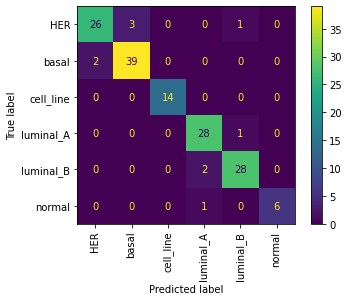

In [ ]:
label = [ 'HER','basal','cell_line', 'luminal_A','luminal_B','normal'] 
y_pred_rf=cross_val_predict(clf_rf, X,y,cv=5)  
cm_rf = confusion_matrix(y, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf,display_labels= label)
print("             Random Forest Confusion Matrix CV=5     ")
disp_rf.plot(xticks_rotation='vertical')

In [ ]:
print("\033[1m"  +'      ' +  ' Random Forest Stratified cross-validation CV=5'  + "\033[0m"    )
print("                                                          ")
print("Correctly Classified Instances = {}.".format(accuracy_score(y, y_pred_rf, normalize=False)))
print("Percentage of Correctly Classified Instances = {:.2f}.".format(accuracy_score(y, y_pred_rf,)))
print('Kappa statistic= {:.2f}.'. format(cohen_kappa_score(y , y_pred_rf)))
print('Mean absolute error = {:.2f}.'. format(mean_absolute_error(y , y_pred_rf, multioutput= 'uniform_average')))
print('Root Mean Squared error = {:.2f}.'. format(mean_squared_error (y , y_pred_rf, squared=False)))
print('Matthews Corrcoef = {:.2f}.'. format(matthews_corrcoef(y, y_pred_rf)))
print("Accuracy =% 0.2f with a %0.2f standard deviation" % (scores_rf.mean(), scores_rf.std()))
print("                                                          ")
print("\033[1m"  +'                 ' +  'Detailed Accuracy By Class' + "\033[0m" )
print(classification_report(y, y_pred_rf, target_names=label ))

       Random Forest Stratified cross-validation CV=5
                                                          
Correctly Classified Instances = 141.
Percentage of Correctly Classified Instances = 0.93.
Kappa statistic= 0.92.
Mean absolute error = 0.09.
Root Mean Squared error = 0.43.
Matthews Corrcoef = 0.92.
Accuracy = 0.95 with a 0.05 standard deviation
                                                          
                 Detailed Accuracy By Class
              precision    recall  f1-score   support

         HER       0.93      0.87      0.90        30
       basal       0.93      0.95      0.94        41
   cell_line       1.00      1.00      1.00        14
   luminal_A       0.90      0.97      0.93        29
   luminal_B       0.93      0.93      0.93        30
      normal       1.00      0.86      0.92         7

    accuracy                           0.93       151
   macro avg       0.95      0.93      0.94       151
weighted avg       0.93      0.93      0.93      

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
clf_nb = MultinomialNB()
scores_nb=cross_val_score(clf_nb, X , y, cv=5)
scores_nb

array([1.        , 0.96666667, 0.96666667, 0.9       , 0.83333333])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_nb.mean(), scores_nb.std()))

0.93 accuracy with a standard deviation of 0.06


             Naive Bayes Confusion Matrix CV=5   


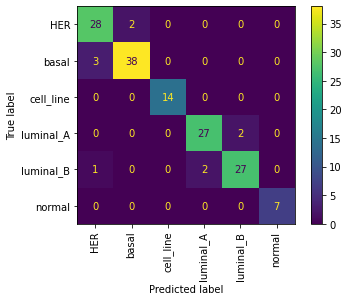

In [ ]:
label = [ 'HER','basal','cell_line', 'luminal_A','luminal_B','normal'] 
y_pred_nb=cross_val_predict(clf_nb, X,y,cv=5)  
cm_nb = confusion_matrix(y, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb,display_labels= label)

print("             Naive Bayes Confusion Matrix CV=5   ")
disp_nb.plot(xticks_rotation='vertical')

In [ ]:
print("\033[1m"  +'      ' +  'Naive Bayes Stratified cross-validation  CV=5'  + "\033[0m"    )
print("                                                          ")
print("Correctly Classified Instances = {}.".format(accuracy_score(y, y_pred_nb, normalize=False)))
print("Percentage of Correctly Classified Instances = {:.2f}.".format(accuracy_score(y, y_pred_nb,)))
print('Kappa statistic= {:.2f}.'. format(cohen_kappa_score(y , y_pred_nb)))
print('Mean absolute error = {:.2f}.'. format(mean_absolute_error(y , y_pred_nb, multioutput= 'uniform_average')))
print('Root Mean Squared error = {:.2f}.'. format(mean_squared_error (y , y_pred_nb, squared=False)))
print('Matthews Corrcoef = {:.2f}.'. format(matthews_corrcoef(y, y_pred_nb)))
print("Accuracy =% 0.2f with a %0.2f standard deviation" % (scores_nb.mean(), scores_nb.std()))
print("                                                          ")
print("\033[1m"  +'                 ' +  'Detailed Accuracy By Class' + "\033[0m" )
print(classification_report(y, y_pred_nb, target_names=label ))

      Naive Bayes Stratified cross-validation  CV=5
                                                          
Correctly Classified Instances = 141.
Percentage of Correctly Classified Instances = 0.93.
Kappa statistic= 0.92.
Mean absolute error = 0.09.
Root Mean Squared error = 0.41.
Matthews Corrcoef = 0.92.
Accuracy = 0.93 with a 0.06 standard deviation
                                                          
                 Detailed Accuracy By Class
              precision    recall  f1-score   support

         HER       0.88      0.93      0.90        30
       basal       0.95      0.93      0.94        41
   cell_line       1.00      1.00      1.00        14
   luminal_A       0.93      0.93      0.93        29
   luminal_B       0.93      0.90      0.92        30
      normal       1.00      1.00      1.00         7

    accuracy                           0.93       151
   macro avg       0.95      0.95      0.95       151
weighted avg       0.93      0.93      0.93       1

**Multilayer Perceptron**

def __init__(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

In [ ]:
from sklearn.neural_network import MLPClassifier


In [ ]:
model = MLPClassifier(hidden_layer_sizes =(10,), batch_size = 100, learning_rate_init = 0.3, momentum= 0.2, validation_fraction=0,
                      activation= 'identity') 

cv_results = cross_val_score(model, X, y, cv=5 )
cv_results

array([0.90322581, 0.73333333, 0.93333333, 0.8       , 0.86666667])

In [ ]:
model

MLPClassifier(activation='identity', alpha=0.0001, batch_size=100, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10,), learning_rate='constant',
              learning_rate_init=0.3, max_fun=15000, max_iter=200, momentum=0.2,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0, verbose=False, warm_start=False)

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (cv_results.mean(), cv_results.std()))

0.85 accuracy with a standard deviation of 0.07


             MLP Confusion Matrix  CV=5    


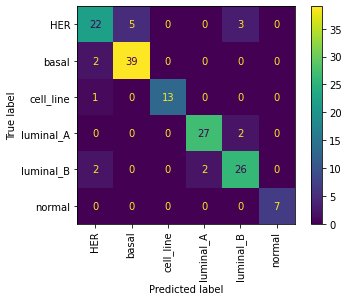

In [ ]:
label = [ 'HER','basal','cell_line', 'luminal_A','luminal_B','normal'] 

y_pred_mlp=cross_val_predict(model, X,y,cv=5)  

cm_mlp = confusion_matrix(y, y_pred_mlp)
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp,display_labels= label)

print("             MLP Confusion Matrix  CV=5    ")
disp_mlp.plot(xticks_rotation='vertical')

In [ ]:
print("\033[1m"  +'      ' +  'MLP Stratified cross-validation CV=5'  + "\033[0m"    )
print("                                                          ")
print("Correctly Classified Instances = {}.".format(accuracy_score(y, y_pred_mlp, normalize=False)))
print("Percentage of Correctly Classified Instances = {:.2f}.".format(accuracy_score(y, y_pred_mlp,)))
print('Kappa statistic= {:.2f}.'. format(cohen_kappa_score(y , y_pred_mlp)))
print('Mean absolute error = {:.2f}.'. format(mean_absolute_error(y , y_pred_mlp, multioutput= 'uniform_average')))
print('Root Mean Squared error = {:.2f}.'. format(mean_squared_error (y , y_pred_mlp, squared=False)))
print('Matthews Corrcoef = {:.2f}.'. format(matthews_corrcoef(y, y_pred_mlp)))
print("Accuracy =% 0.2f with a %0.2f standard deviation" % (cv_results.mean(), cv_results.std()))
print("                                                          ")
print("\033[1m"  +'                 ' +  'Detailed Accuracy By Class' + "\033[0m" )
print(classification_report(y, y_pred_mlp, target_names=label ))

      MLP Stratified cross-validation CV=5
                                                          
Correctly Classified Instances = 134.
Percentage of Correctly Classified Instances = 0.89.
Kappa statistic= 0.86.
Mean absolute error = 0.22.
Root Mean Squared error = 0.79.
Matthews Corrcoef = 0.86.
Accuracy = 0.85 with a 0.07 standard deviation
                                                          
                 Detailed Accuracy By Class
              precision    recall  f1-score   support

         HER       0.81      0.73      0.77        30
       basal       0.89      0.95      0.92        41
   cell_line       1.00      0.93      0.96        14
   luminal_A       0.93      0.93      0.93        29
   luminal_B       0.84      0.87      0.85        30
      normal       1.00      1.00      1.00         7

    accuracy                           0.89       151
   macro avg       0.91      0.90      0.91       151
weighted avg       0.89      0.89      0.89       151



**K-Nearest Neighbour**

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=5, algorithm= 'brute')
#neigh.fit(X, y)
scores_knn=cross_val_score(neigh, X , y, cv=5)
scores_knn

array([0.93548387, 0.83333333, 0.9       , 0.8       , 0.83333333])

In [ ]:
neigh

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_knn.mean(), scores_knn.std()))


0.86 accuracy with a standard deviation of 0.05


             k-NN Confusion Matrix CV=5       


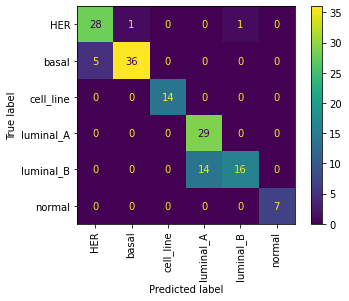

In [ ]:
label = [ 'HER','basal','cell_line', 'luminal_A','luminal_B','normal'] 

y_pred_knn=cross_val_predict(neigh, X,y,cv=5)
  
cm_knn = confusion_matrix(y, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn,display_labels= label)

print("             k-NN Confusion Matrix CV=5       ")
disp_knn.plot(xticks_rotation='vertical')

In [ ]:
print("\033[1m"  +'      ' +  'k-NN Stratified cross-validation  CV=5'  + "\033[0m"    )
print("                                                          ")
print("Correctly Classified Instances = {}.".format(accuracy_score(y, y_pred_knn, normalize=False)))
print("Percentage of Correctly Classified Instances = {:.2f}.".format(accuracy_score(y, y_pred_knn,)))
print('Kappa statistic= {:.2f}.'. format(cohen_kappa_score(y , y_pred_knn)))
print('Mean absolute error = {:.2f}.'. format(mean_absolute_error(y , y_pred_knn, multioutput= 'uniform_average')))
print('Root Mean Squared error = {:.2f}.'. format(mean_squared_error (y , y_pred_knn, squared=False)))
print('Matthews Corrcoef = {:.2f}.'. format(matthews_corrcoef(y, y_pred_knn)))
print("Accuracy =% 0.2f with a %0.2f standard deviation" % (scores_knn.mean(), scores_knn.std()))
print("                                                          ")
print("\033[1m"  +'                 ' +  'Detailed Accuracy By Class' + "\033[0m" )
print(classification_report(y, y_pred_knn, target_names=label ))

      k-NN Stratified cross-validation  CV=5
                                                          
Correctly Classified Instances = 130.
Percentage of Correctly Classified Instances = 0.86.
Kappa statistic= 0.83.
Mean absolute error = 0.16.
Root Mean Squared error = 0.49.
Matthews Corrcoef = 0.84.
Accuracy = 0.86 with a 0.05 standard deviation
                                                          
                 Detailed Accuracy By Class
              precision    recall  f1-score   support

         HER       0.85      0.93      0.89        30
       basal       0.97      0.88      0.92        41
   cell_line       1.00      1.00      1.00        14
   luminal_A       0.67      1.00      0.81        29
   luminal_B       0.94      0.53      0.68        30
      normal       1.00      1.00      1.00         7

    accuracy                           0.86       151
   macro avg       0.91      0.89      0.88       151
weighted avg       0.89      0.86      0.86       151

